<h1>Case Study:Predicting the Liver Disease using KNN algorithm</h1>

<h1>Introduction</h1>
<h2>This Machine Learning model predicts whether the patient has liver disease or not on the basis of liver test results</h2>

<h1>Objective</h1>
<h2>Predict Liver Disease using K Nearest Neighbors Algorithm</h2>

<h2>Acquire the Data</h2>

In [2]:
import numpy as np
import pandas as pd
data=pd.read_csv("G:\ML\indian_liver_patient.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<h2>Dataset Description</h2>

In [3]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


<h2>Preprocessing of Data</h2>

In [5]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
#Here Albumin_and_Globulin_Ratio has 4 null values,relpacing it with mean values
data['Albumin_and_Globulin_Ratio'] = data.Albumin_and_Globulin_Ratio.fill(data['Albumin_and_Globulin_Ratio'].mean())

In [7]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [8]:
data.shape

(583, 11)

<h2>Convert Categorical into Numerical</h2>

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
var=data.columns
le=LabelEncoder()

for i in var:
    data[i]=le.fit_transform(data[i])

In [11]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,58,0,3,0,72,6,8,34,21,31,0
1,55,1,69,45,236,54,86,41,20,23,0
2,55,1,56,36,202,50,58,36,21,30,0
3,52,1,6,3,67,4,10,34,22,38,0
4,64,1,35,19,80,17,49,39,12,4,0


In [12]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,53,1,1,0,204,10,24,25,4,2,1
579,34,1,2,0,5,25,21,26,20,43,0
580,46,1,4,1,118,38,39,30,20,38,0
581,25,1,9,4,69,19,22,34,22,38,0
582,32,1,6,2,98,11,14,39,32,57,1


<h2>Data Visualization</h2>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009976414BC8>,
      dtype=object)

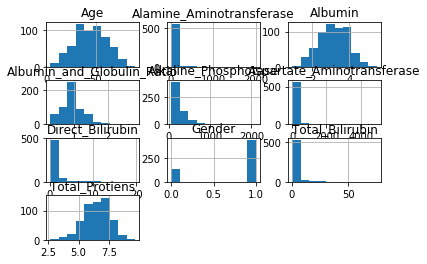

In [225]:
df.hist()

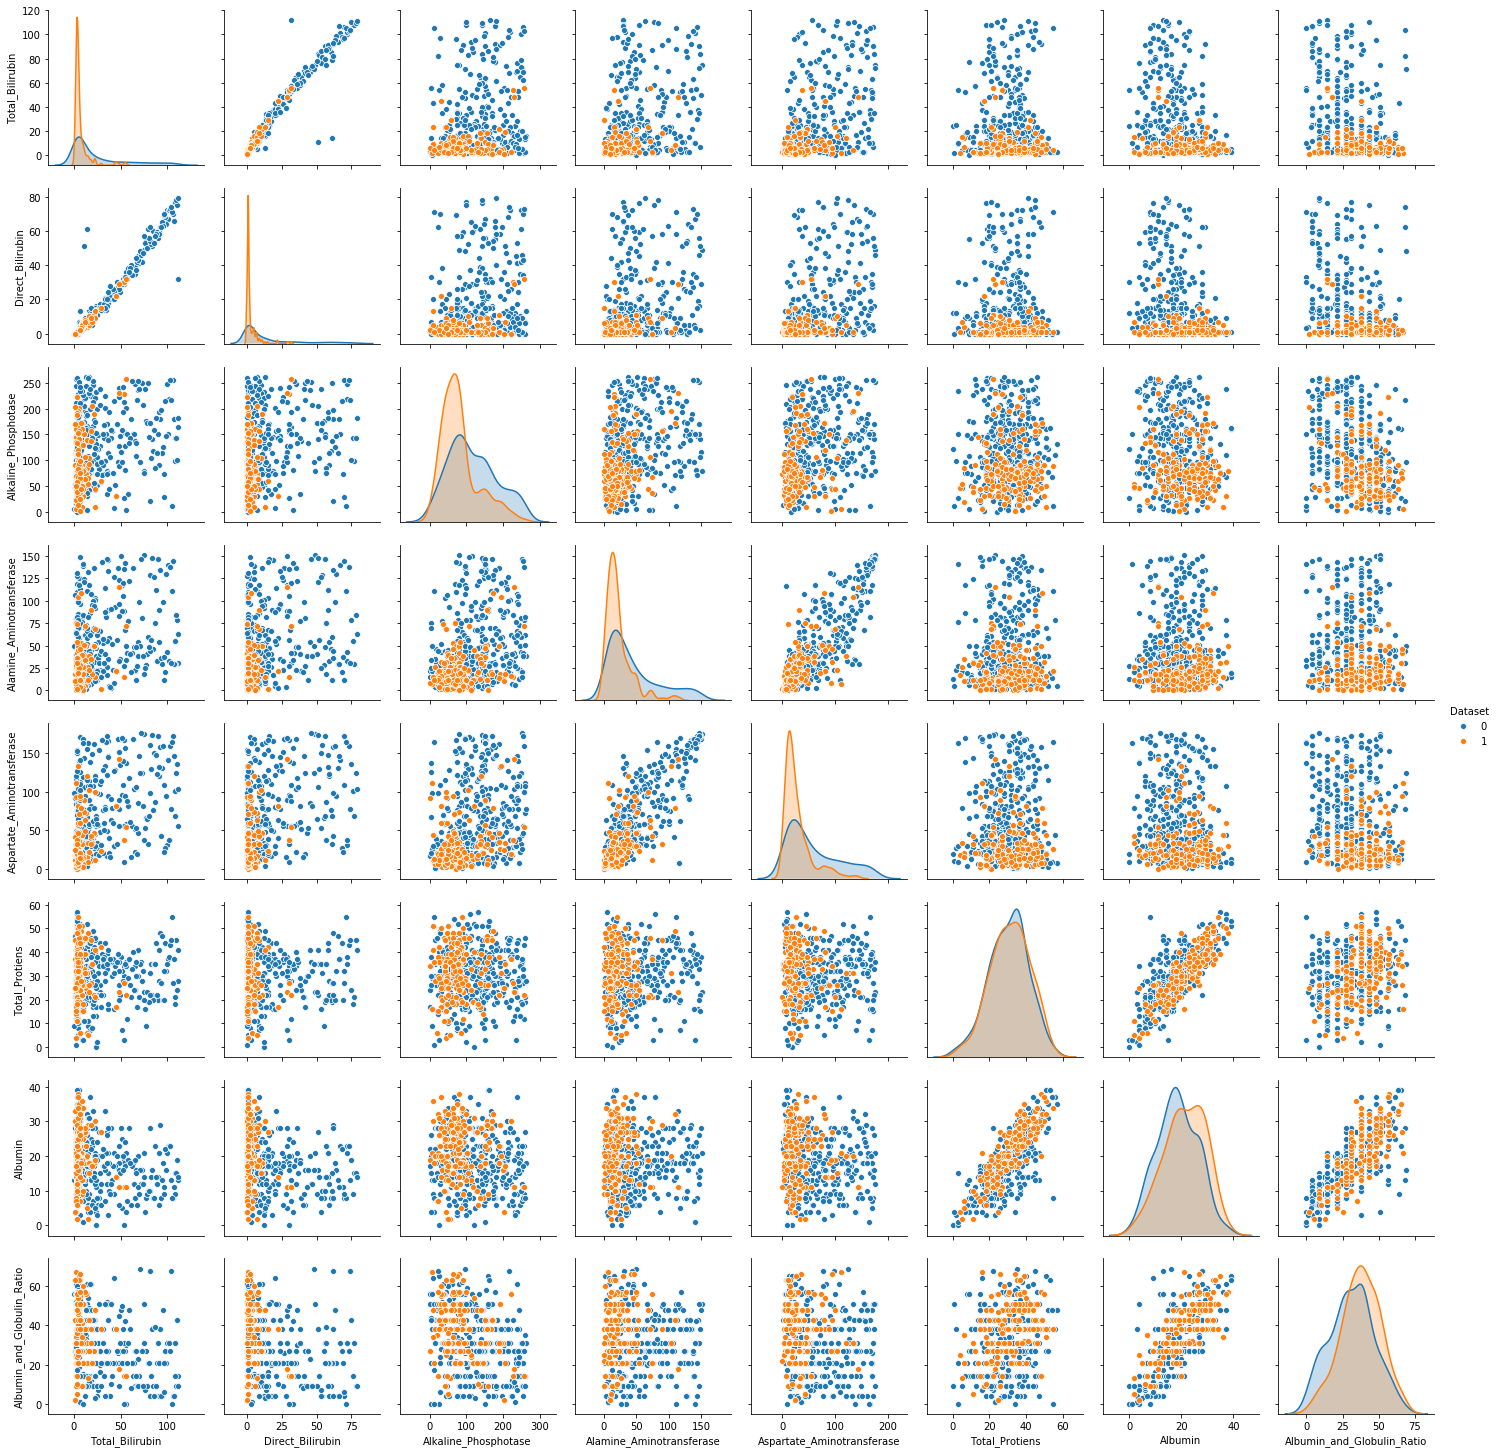

In [380]:
import seaborn as sns
df=data.drop(['Age','Gender'],axis=1)
sns.pairplot(df,hue='Dataset')
#Here 0 indicates patient does not have liver disease
#And 1 indicates patient has liver disease

<h2>Feature Selection</h2>
<h2>Separate the X(independent variable) and y(target variable)</h2>

In [13]:
X=data.drop('Dataset',axis=1)
y=data['Dataset']
X.shape

(583, 10)

In [14]:
y.shape

(583,)

<h1>Train Test Split</h1>

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [25]:
X_train.shape

(408, 10)

In [26]:
y_train.shape

(408,)

In [27]:
X_test.shape

(175, 10)

In [20]:
y_test.shape

(175,)

<h1>For classification it is necessary to do scaling using techniques like standardization</h1>

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [22]:
X_train

array([[ 0.64425127,  0.55847749, -0.64968557, ..., -1.30682343,
        -0.92005048, -0.24288655],
       [ 0.64425127,  0.55847749,  0.84197274, ...,  0.5916418 ,
        -1.29999036, -1.89451509],
       [-0.30858048,  0.55847749, -0.12558941, ..., -2.06620953,
        -1.93322348, -1.23386367],
       ...,
       [-0.49914683,  0.55847749, -0.1659045 , ..., -0.73728386,
        -0.28681736,  0.35169972],
       [ 0.83481762, -1.79058247,  0.2372464 , ..., -1.68651648,
        -1.93322348, -1.56418938],
       [ 1.02538397,  0.55847749, -0.1659045 , ...,  2.01549073,
         1.10629552, -0.37501683]])

In [41]:
X_test

array([[-0.02832348,  0.58834841, -0.42454082, ...,  1.38263529,
         1.05354177,  0.23651382],
       [ 1.92823274,  0.58834841, -0.56591978, ...,  0.36404634,
         0.66890378,  0.58374468],
       [ 0.16733214, -1.69967317, -0.60126452, ..., -0.46934462,
        -0.35679753, -0.24960939],
       ...,
       [-0.2239791 ,  0.58834841, -0.4952303 , ..., -1.48793358,
        -0.48501019,  1.13931406],
       [-2.3109724 , -1.69967317,  3.00389897, ..., -0.37674563,
        -1.5107115 , -2.12465604],
       [ 0.29776922, -1.69967317, -0.60126452, ..., -1.21013659,
        -0.86964818, -0.24960939]])

<h2>Training of Model</h2>

In [28]:
from sklearn.neighbors import KNeighborsClassifier
mymodel=KNeighborsClassifier(n_neighbors=5)
result=mymodel.fit(X_train,y_train)

<h2>Testing</h2>

In [29]:
predictions=result.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

 <h2>Evaluation</h2>

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
print('Accuracy of algorithm is',accuracy_score(y_test,predictions)*100)

Accuracy of algorithm is 71.42857142857143


In [33]:
from sklearn.metrics import classification_report
accuracy = classification_report(y_test,predictions)
print(accuracy)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       129
           1       0.45      0.43      0.44        46

    accuracy                           0.71       175
   macro avg       0.63      0.62      0.63       175
weighted avg       0.71      0.71      0.71       175



In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[105  24]
 [ 26  20]]


In [35]:
#Selection of best values of k
from sklearn import metrics
k_range=range(1,30)
scorelist=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_prediction=knn.predict(X_test)
    scorelist.append(metrics.accuracy_score(y_test,y_prediction))
    
print(scorelist)

[0.6228571428571429, 0.7028571428571428, 0.72, 0.72, 0.7142857142857143, 0.6971428571428572, 0.7314285714285714, 0.72, 0.76, 0.7314285714285714, 0.7314285714285714, 0.7085714285714285, 0.7085714285714285, 0.7085714285714285, 0.7028571428571428, 0.72, 0.72, 0.6971428571428572, 0.6857142857142857, 0.6857142857142857, 0.6971428571428572, 0.6971428571428572, 0.7085714285714285, 0.6971428571428572, 0.7085714285714285, 0.6971428571428572, 0.7257142857142858, 0.7028571428571428, 0.7142857142857143]


<h2>Output</h2>

In [37]:
Age=int(input("Enter age\n"))                         
Gender=int(input("Enter Gendeer\n"))                        
Total_Bilirubin=int(input("Total_Bilirubin\n"))             
Direct_Bilirubin=int(input("Enter Direct_Bilirubin\n"))              
Alkaline_Phosphotase=int(input("Enter Alkaline_Phosphotase\n"))          
Alamine_Aminotransferase=int(input("Enter Alamine_Aminotransferase\n"))      
Aspartate_Aminotransferase=int(input("Enter Aspartate_Aminotransferase\n"))    
Total_Protiens=int(input("Enter Total_Protiens\n"))                
Albumin=int(input("EnterAlbumin\n"))                       
Albumin_and_Globulin_Ratio=int(input("Enter Albumin_and_Globulin_Ratio\n"))
predictions=result.predict([[Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio]])
if predictions==1:
    print("Patient has liver disease")
else:
    print("Patient does not have liver disease")

Enter age
37
Enter Gendeer
1
Total_Bilirubin
9
Enter Direct_Bilirubin
5
Enter Alkaline_Phosphotase
40
Enter Alamine_Aminotransferase
5
Enter Aspartate_Aminotransferase
10
Enter Total_Protiens
46
EnterAlbumin
28
Enter Albumin_and_Globulin_Ratio
38
Patient does not have liver disease


In [36]:
Age=int(input("Enter age\n"))                         
Gender=int(input("Enter Gendeer\n"))                        
Total_Bilirubin=int(input("Total_Bilirubin\n"))             
Direct_Bilirubin=int(input("Enter Direct_Bilirubin\n"))              
Alkaline_Phosphotase=int(input("Enter Alkaline_Phosphotase\n"))          
Alamine_Aminotransferase=int(input("Enter Alamine_Aminotransferase\n"))      
Aspartate_Aminotransferase=int(input("Enter Aspartate_Aminotransferase\n"))    
Total_Protiens=int(input("Enter Total_Protiens\n"))                
Albumin=int(input("EnterAlbumin\n"))                       
Albumin_and_Globulin_Ratio=int(input("Enter Albumin_and_Globulin_Ratio\n"))
predictions=result.predict([[Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio]])
if predictions==1:
    print("Patient has liver disease")
else:
    print("Patient does not have liver disease")

Enter age
67
Enter Gendeer
1
Total_Bilirubin
5
Enter Direct_Bilirubin
1
Enter Alkaline_Phosphotase
47
Enter Alamine_Aminotransferase
15
Enter Aspartate_Aminotransferase
10
Enter Total_Protiens
35
EnterAlbumin
25
Enter Albumin_and_Globulin_Ratio
43
Patient has liver disease


<h2>Conclusion</h2>
<h3>Our model predicts the patients with liver disease with accuracy score of 71.42</h3>